In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [160]:
DG = pd.read_csv(r'C:\Users\aalok\Downloads\Dollar_General_USA.csv.zip')
DG.drop(['Banner',  "Provider", "Stock Ticker", "URL", "Updated Date", "Status"],  axis=1, inplace=True)


In [161]:
ACS1 = pd.read_csv(r'C:\Users\aalok\Downloads\acs2017_county_data_cleaned - acs2017_county_data.csv')

C:\Users\aalok\anaconda3\anaconda3.0\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [162]:
ACS1.shape

(17989, 42)

**Cleaning the ACS Dataframe**

We want to combine the two dataframes we have now, however, I will be doing so by adding our target variable to the ACS data frame. Target variable will be named "DG in County" and will either be a 1 (Yes) or 0 (No).

We also want to drop the columns that are uneccesary within the ACS dataframe so we can begin modeling. 

In [163]:
ACS1.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,DG in County,State.1,County.1,Search Key Orig,Search Key DG in County
0,1001.0,Alabama,Autauga,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,...,74.1,20.2,5.6,0.1,5.2,1.0,Louisiana,Calcasieu Parish,Autauga Alabama,Calcasieu Parish Louisiana
1,1003.0,Alabama,Baldwin,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,...,80.7,12.9,6.3,0.1,5.5,1.0,Louisiana,Grant Parish,Baldwin Alabama,Grant Parish Louisiana
2,1005.0,Alabama,Barbour,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,...,74.1,19.1,6.5,0.3,12.4,1.0,Georgia,Rabun,Barbour Alabama,Rabun Georgia
3,1007.0,Alabama,Bibb,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,...,76.0,17.4,6.3,0.3,8.2,1.0,Georgia,Columbia,Bibb Alabama,Columbia Georgia
4,1009.0,Alabama,Blount,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,...,83.9,11.9,4.0,0.1,4.9,1.0,Georgia,DeKalb,Blount Alabama,DeKalb Georgia


In [164]:
ACS1.drop(['State.1',  "County.1", "Search Key Orig", "Search Key DG in County", "CountyId"],  axis=1, inplace=True)

In [165]:
ACS1.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,DG in County
0,Alabama,Autauga,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,0.9,...,1.3,2.5,25.8,24112.0,74.1,20.2,5.6,0.1,5.2,1.0
1,Alabama,Baldwin,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,0.7,...,1.1,5.6,27.0,89527.0,80.7,12.9,6.3,0.1,5.5,1.0
2,Alabama,Barbour,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,0.6,...,1.7,1.3,23.4,8878.0,74.1,19.1,6.5,0.3,12.4,1.0
3,Alabama,Bibb,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,0.0,...,1.7,1.5,30.0,8171.0,76.0,17.4,6.3,0.3,8.2,1.0
4,Alabama,Blount,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,0.1,...,0.4,2.1,35.0,21380.0,83.9,11.9,4.0,0.1,4.9,1.0


In [166]:
ACS1['DG in County'].value_counts()

1.0    2517
0.0     703
Name: DG in County, dtype: int64

In [167]:
ACS1.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,DG in County
0,Alabama,Autauga,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,0.9,...,1.3,2.5,25.8,24112.0,74.1,20.2,5.6,0.1,5.2,1.0
1,Alabama,Baldwin,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,0.7,...,1.1,5.6,27.0,89527.0,80.7,12.9,6.3,0.1,5.5,1.0
2,Alabama,Barbour,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,0.6,...,1.7,1.3,23.4,8878.0,74.1,19.1,6.5,0.3,12.4,1.0
3,Alabama,Bibb,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,0.0,...,1.7,1.5,30.0,8171.0,76.0,17.4,6.3,0.3,8.2,1.0
4,Alabama,Blount,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,0.1,...,0.4,2.1,35.0,21380.0,83.9,11.9,4.0,0.1,4.9,1.0


In [168]:
ACS1['County'] = ACS1['County'].str.replace('County', '')
ACS1['County'] = ACS1['County'].str.rstrip()

In [169]:
ACS1.head(50)

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,DG in County
0,Alabama,Autauga,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,0.9,...,1.3,2.5,25.8,24112.0,74.1,20.2,5.6,0.1,5.2,1.0
1,Alabama,Baldwin,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,0.7,...,1.1,5.6,27.0,89527.0,80.7,12.9,6.3,0.1,5.5,1.0
2,Alabama,Barbour,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,0.6,...,1.7,1.3,23.4,8878.0,74.1,19.1,6.5,0.3,12.4,1.0
3,Alabama,Bibb,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,0.0,...,1.7,1.5,30.0,8171.0,76.0,17.4,6.3,0.3,8.2,1.0
4,Alabama,Blount,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,0.1,...,0.4,2.1,35.0,21380.0,83.9,11.9,4.0,0.1,4.9,1.0
5,Alabama,Bullock,10478.0,5616.0,4862.0,0.3,21.6,75.6,1.0,0.7,...,1.7,3.0,29.8,4290.0,81.4,13.6,5.0,0.0,12.1,1.0
6,Alabama,Butler,20126.0,9416.0,10710.0,0.3,52.2,44.7,0.1,1.1,...,0.9,2.0,23.2,7727.0,79.1,15.3,5.3,0.3,7.6,1.0
7,Alabama,Calhoun,115527.0,55593.0,59934.0,3.6,72.7,20.4,0.2,1.0,...,1.1,3.2,24.8,47392.0,74.9,19.9,5.1,0.1,10.1,1.0
8,Alabama,Chambers,33895.0,16320.0,17575.0,2.2,56.2,39.3,0.3,1.0,...,0.5,2.0,23.6,14527.0,84.5,11.8,3.7,0.0,6.4,1.0
9,Alabama,Cherokee,25855.0,12862.0,12993.0,1.6,91.8,5.0,0.5,0.1,...,0.3,2.0,26.5,9879.0,74.8,17.1,8.1,0.0,5.3,1.0


Firstly - Dollar General is currently not operating in Montana, Idaho, Alaska, Hawaii, Washington DC or Puerto Rico. Thus, we can set our "Dollar General in County" column to 0 for any county within these states/jurisdictions.

In [134]:
for i in ACS1['State']:
        ACS1.loc[ACS1.State == 'Montana', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'Idaho', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'Alaska', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'Hawaii', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'Puerto Rico', "DG in County"] = 0
        ACS1.loc[ACS1.State == 'District of Columbia', "DG in County"] = 0

In [135]:
ACS1['DG in County'].value_counts()

1.0    2517
0.0     703
Name: DG in County, dtype: int64

In [139]:
ACS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17989 entries, 0 to 17988
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             3220 non-null   object 
 1   County            3220 non-null   object 
 2   TotalPop          3220 non-null   float64
 3   Men               3220 non-null   float64
 4   Women             3220 non-null   float64
 5   Hispanic          3220 non-null   float64
 6   White             3220 non-null   float64
 7   Black             3220 non-null   float64
 8   Native            3220 non-null   float64
 9   Asian             3220 non-null   float64
 10  Pacific           3220 non-null   float64
 11  VotingAgeCitizen  3220 non-null   float64
 12  Income            3220 non-null   float64
 13  IncomeErr         3220 non-null   float64
 14  IncomePerCap      3220 non-null   float64
 15  IncomePerCapErr   3220 non-null   float64
 16  Poverty           3220 non-null   float6

In [177]:
ACS1.shape

(17989, 37)

In [181]:
ACS1.dropna(inplace=True)

In [182]:
ACS1.shape

(3219, 37)

In [183]:
X = ACS1.loc[:, ACS1.columns != 'DG in County']
X = X.loc[:, X.columns != 'State']
X = X.loc[:, X.columns != 'County']
y = ACS1['DG in County']
X.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,0.9,0.0,41016.0,...,0.6,1.3,2.5,25.8,24112.0,74.1,20.2,5.6,0.1,5.2
1,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,0.7,0.0,155376.0,...,0.8,1.1,5.6,27.0,89527.0,80.7,12.9,6.3,0.1,5.5
2,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,0.6,0.0,20269.0,...,2.2,1.7,1.3,23.4,8878.0,74.1,19.1,6.5,0.3,12.4
3,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,0.0,0.0,17662.0,...,0.3,1.7,1.5,30.0,8171.0,76.0,17.4,6.3,0.3,8.2
4,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,0.1,0.0,42513.0,...,0.4,0.4,2.1,35.0,21380.0,83.9,11.9,4.0,0.1,4.9


In [184]:
for col in X.columns:
    #Subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    X[col] = (X[col] - min(X[col]))/ (max(X[col]) - min(X[col])) 

X.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,...,0.010135,0.030093,0.075758,0.5175,0.005009,0.745234,0.261589,0.147368,0.0125,0.127139
1,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,...,0.013514,0.025463,0.169697,0.5475,0.018621,0.859619,0.140728,0.165789,0.0125,0.134474
2,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,...,0.037162,0.039352,0.039394,0.4575,0.001839,0.745234,0.243377,0.171053,0.0375,0.303178
3,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,...,0.005068,0.039352,0.045455,0.6225,0.001692,0.778163,0.215232,0.165789,0.0375,0.200489
4,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,...,0.006757,0.009259,0.063636,0.7475,0.004441,0.915078,0.124172,0.105263,0.0125,0.119804


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [186]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 465 to 2994
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalPop          2414 non-null   float64
 1   Men               2414 non-null   float64
 2   Women             2414 non-null   float64
 3   Hispanic          2414 non-null   float64
 4   White             2414 non-null   float64
 5   Black             2414 non-null   float64
 6   Native            2414 non-null   float64
 7   Asian             2414 non-null   float64
 8   Pacific           2414 non-null   float64
 9   VotingAgeCitizen  2414 non-null   float64
 10  Income            2414 non-null   float64
 11  IncomeErr         2414 non-null   float64
 12  IncomePerCap      2414 non-null   float64
 13  IncomePerCapErr   2414 non-null   float64
 14  Poverty           2414 non-null   float64
 15  ChildPoverty      2414 non-null   float64
 16  Professional      2414 non-null   float6

In [187]:
X_train.shape

(2414, 34)

In [188]:
y_train.value_counts()

1.0    1910
0.0     504
Name: DG in County, dtype: int64

In [189]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [190]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [191]:
import numpy as np
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    2038
1.0     376
Name: DG in County, dtype: int64
0.0    0.844242
1.0    0.155758
Name: DG in County, dtype: float64


In [192]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    652
1.0    153
Name: DG in County, dtype: int64
0.0    0.809938
1.0    0.190062
Name: DG in County, dtype: float64


In [197]:
logreg2 = LogisticRegression(fit_intercept=False, C=1e12, solver='sag')
model_log2 = logreg2.fit(X_train, y_train)
model_log2

C:\Users\aalok\anaconda3\anaconda3.0\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='sag')

In [198]:
y_hat_test = logreg2.predict(X_test)
y_hat_train = logreg2.predict(X_train)

In [199]:
residuals2 = np.abs(y_train - y_hat_train)
print(pd.Series(residuals2).value_counts())
print(pd.Series(residuals2).value_counts(normalize=True))

0.0    2034
1.0     380
Name: DG in County, dtype: int64
0.0    0.842585
1.0    0.157415
Name: DG in County, dtype: float64


In [200]:
residuals2 = np.abs(y_test - y_hat_test)
print(pd.Series(residuals2).value_counts())
print(pd.Series(residuals2).value_counts(normalize=True))

0.0    654
1.0    151
Name: DG in County, dtype: int64
0.0    0.812422
1.0    0.187578
Name: DG in County, dtype: float64


In [217]:
def logreg(X_train, X_test, y_train, y_test, cv=5):
    
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'penalty': ['l1', 'l2' ,'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    
    # Instantiate & fit LogReg model for GridSearch
    grid_logreg = LogisticRegression(random_state=42)
    grid_logreg.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_logreg, param_grid=grid, cv=cv,
                      scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    logreg_params = gs.best_params_
    
    # Use best penalty from best_params
    logreg_penalty = logreg_params['penalty']
    print(f'Penalty: {logreg_penalty}')
    
    # Use best solver from best_params
    logreg_solver = logreg_params['solver']
    print(f'Solver: {logreg_solver}')
    
    # Instantiate & fit LogReg model
    log = LogisticRegression(random_state=420, penalty=logreg_penalty, solver=logreg_solver)
    log.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = log.predict(X_test)
    y_pred_proba = log.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(log, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = log.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = log.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
  
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(log, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(log, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(log, X_train, y_train)
    plot_confusion_matrix(log, X_test, y_test)
    return y_pred,y_pred_proba

C:\Users\aalok\anaconda3\anaconda3.0\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aalok\anaconda3\anaconda3.0\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aalok\anaconda3\anaconda3.0\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aalok\anaconda3\anaconda3.0\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.8396854032971659
Train Mean Accuracy: 0.8405136702568351
Test Mean Accuracy: 0.8111801242236025
Recall Score: 0.9686985172981878
Precision Score: 0.8155339805825242
F1 Score: 0.8855421686746988


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

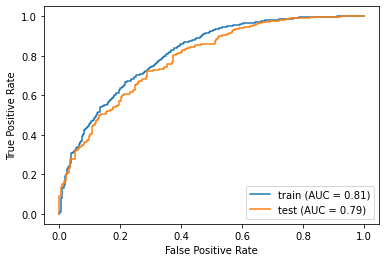

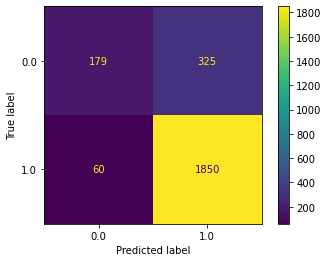

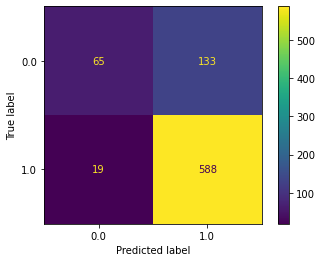

In [218]:
logreg(X_train, X_test, y_train, y_test, cv=5)

In [222]:
def dtree(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'max_depth': [3,10,15],
    'min_samples_split': [2,8,10,15],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Decision Tree model for GridSearch
    grid_dt = DecisionTreeClassifier()
    grid_dt.fit(X_train, y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_dt, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    dt_params = gs.best_params_
    
    # Use best max depth from best_params
    dt_max_depth = dt_params['max_depth']
    print(f'Max Depth: {dt_max_depth}')
    
    # Use best minimum sample split from best_params
    dt_min_samp = dt_params['min_samples_split']
    print(f'Min Sample Split: {dt_min_samp}')
    
    # Use best criterion from best_params
    dt_criterion = dt_params['criterion']
    print(f'criterion: {dt_criterion}')
    
    # Instantiate & fit Decision Tree model
    dtree = DecisionTreeClassifier(max_depth=dt_max_depth, criterion=dt_criterion,
                                   min_samples_split=dt_min_samp, random_state=420)
    dtree.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = dtree.predict(X_test)
    y_prob= dtree.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(dtree, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = dtree.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = dtree.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(dtree, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(dtree, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(dtree, X_train, y_train)
    plot_confusion_matrix(dtree, X_test, y_test)
    
    return y_pred,y_prob

Max Depth: 3
Min Sample Split: 2
criterion: gini
Mean Cross-Val Score: 0.8322276917261583
Train Mean Accuracy: 0.8504556752278376
Test Mean Accuracy: 0.8124223602484472
Recall Score: 0.9835255354200988
Precision Score: 0.8089430894308943
F1 score: 0.887732342007435


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 

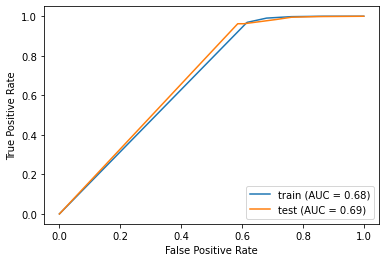

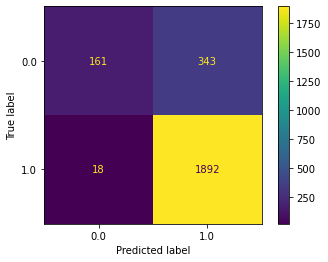

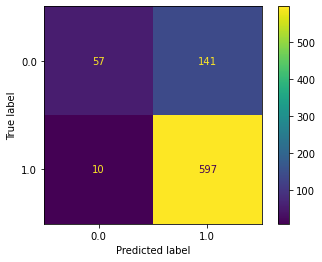

In [223]:
dtree(X_train, X_test, y_train, y_test, cv=5)

In [227]:
def random_forest(X_train, X_test, y_train, y_test, cv=5):
    
    # Set GridSearchCV hyperparameters to compare & select
    grid = {
    'n_estimators': [75,90,100,110,115,125,150,500],
    'criterion': ['gini', 'entropy']}
    
    # Instantiate & fit Random Forest model for GridSearch
    grid_rf = RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    
    # Instantiate & fit GridSearchCV with accuracy scoring
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=cv, scoring='accuracy')
    gs.fit(X_train, y_train)
    
    # Return best hyperparameters
    rf_params = gs.best_params_
    
    # Use best # of trees from best_params
    rf_n_estimators = rf_params['n_estimators']
    print(f'Number of Trees: {rf_n_estimators}')
    
    # Use best criterion from best_params
    rf_criterion = rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    
    # Instantiate & fit Random Forest model
    rforest = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion,
                                    random_state=42)
    rforest.fit(X_train, y_train)
    
    # Create prediction variable using test data
    y_pred = rforest.predict(X_test)
    y_prob = rforest.predict_proba(X_test)
    
    # Run cross-validate score with cv folds from function parameter
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Mean Cross-Val Score: {cv_results.mean()}')
    
    # Run and print accuracy, recall, precision and f1 scores
    train_score = rforest.score(X_train, y_train)
    print(f'Train Mean Accuracy: {train_score}')
    test_score = rforest.score(X_test, y_test)
    print(f'Test Mean Accuracy: {test_score}')
    
    rec_score = recall_score(y_test, y_pred)
    print(f'Recall Score: {rec_score}')
    
    prec_score = precision_score(y_test, y_pred)
    print(f'Precision Score: {prec_score}')
    
    f1 = f1_score(y_test, y_pred)
    print(f'F1 score: {f1}')
    
    # Plot an ROC curve (only works with binary data)
    fig, ax = plt.subplots()
    plot_roc_curve(rforest, X_train, y_train, name='train', ax=ax)
    plot_roc_curve(rforest, X_test, y_test, name='test', ax=ax)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(rforest, X_train, y_train)
    plot_confusion_matrix(rforest, X_test, y_test);
    
    return y_pred,y_prob


Number of Trees: 100
criterion: gini
Mean Cross-Val Score: 0.852939357233061
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8385093167701864
Recall Score: 0.9703459637561779
Precision Score: 0.8402282453637661
F1 score: 0.900611620795107


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 

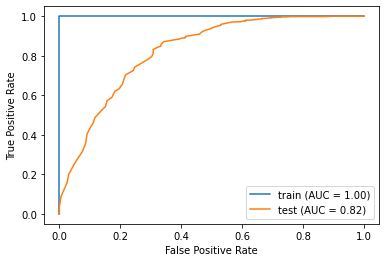

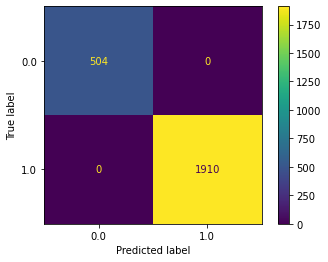

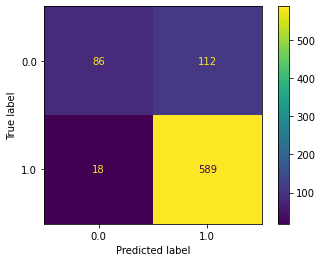

In [228]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

**DG County vs Non-DG County Profile**

In [230]:
ACSDG = ACS1.loc[ACS1['DG in County'] == 1]

ACSNDG = ACS1.loc[ACS1['DG in County'] == 0]

In [232]:
ACSDG.TotalPop.mean()

99747.62614223281

In [233]:
ACSNDG.TotalPop.mean()

104570.52564102564

In [234]:
ACSDG.White.mean()

77.78148589590782

In [235]:
ACSNDG.White.mean()

64.73803418803419

In [236]:
ACSDG.Unemployment.mean()

6.464123957091776

In [237]:
ACSNDG.Unemployment.mean()

7.397435897435898

In [238]:
ACSDG.Poverty.mean()

16.225148986889153

In [239]:
ACSNDG.Poverty.mean()

18.77877492877493

In [240]:
ACSDG.Income.mean()

48799.434247119585

In [241]:
ACSNDG.Income.mean()

49677.87321937322

In [242]:
ACSDG.Transit.mean()

0.7831545490663488

In [243]:
ACSNDG.Transit.mean()

1.4990028490028489

In [245]:
ACSDG.Drive.mean()

80.88216130313866

In [246]:
ACSNDG.Drive.mean()

75.21153846153847

In [247]:
ACSDG.IncomePerCap.mean()

25521.35001986492

In [248]:
ACSNDG.IncomePerCap.mean()

26114.508547008547

In [249]:
ACSDG.ChildPoverty.mean()

22.6450933651172

In [252]:
ACSNDG.ChildPoverty.mean()

24.458831908831907